The Hurst exponent can be calculated by rescaled range analysis (R/S analysis). For a time series, $ X = X_1, X_2, \ldots, X_n $, the R/S analysis method is as follows:

1. Calculate the mean value \( m \):
   $$
   m = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$

2. Calculate the mean adjusted series \( Y \):
   $$
   Y_t = X_t - m, \quad t = 1, 2, \ldots, n
   $$

3. Calculate the cumulative deviate series \( Z \):
   $$
   Z_t = \sum_{i=1}^{t} Y_i, \quad t = 1, 2, \ldots, n
   $$

4. Calculate the range series \( R \):
   $$
   R_t = \max(Z_1, Z_2, \ldots, Z_t) - \min(Z_1, Z_2, \ldots, Z_t), \quad t = 1, 2, \ldots, n
   $$

5. Calculate the standard deviation series \( S \):
   $$
   S_t = \sqrt{\frac{1}{t} \sum_{i=1}^{t} (X_i - \bar{X}_t)^2}, \quad t = 1, 2, \ldots, n
   $$
6. Calculate the rescaled range series \( (R/S)_t \):
   $$
   (R/S)_t = \frac{R_t}{S_t}, \quad t = 1, 2, \ldots, n
   $$
* Then:
$$
(R/S)_t = c * t^H
$$

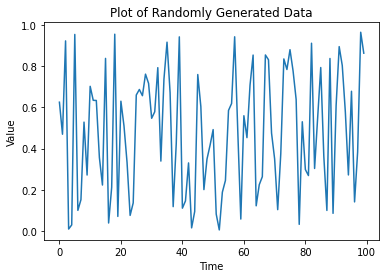

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 10**5
X = np.random.rand(1, n)[0]
plt.plot(X[:100])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Plot of Randomly Generated Data')
plt.show()

In [3]:
X

array([0.69257057, 0.65468688, 0.26151788, ..., 0.93288326, 0.17591916,
       0.3729938 ])

In [2]:
def windows_non_ovrlpg(data, window_size):
    windows = []
    for i in range(0, len(data), window_size):
        window = data[i:i+window_size]
        if len(window) == window_size:  # Ensuring we only take full windows
            windows.append(window)
    return windows

# Example usage:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
window_size = 4
windows = windows_non_ovrlpg(data, window_size)
print(windows)


[[1, 2, 3, 4], [5, 6, 7, 8]]


In [4]:
import numpy as np


def calculate_R_S(X):
    Z = np.cumsum(X - np.mean(X))
    R_S = []
    n = len(X)
    scale = np.arange(10, n + 1, 100)

    for i in scale:
        X_w = windows_non_ovrlpg(X, i)
        Z_w = windows_non_ovrlpg(Z, i)

        S_w = [np.std(x_w) for x_w in X_w]
        R_w = [np.ptp(z_w) for z_w in Z_w]  # ptp calculates range (max - min)

        R_S.append(np.mean(np.array(R_w) / np.array(S_w)))

    return scale, R_S

scale, R_S = calculate_R_S(X)


In [5]:
from scipy.optimize import curve_fit
x,y = np.log10(scale), np.log10(R_S)

def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, x, y)
print(popt)

[0.52904558 0.10709719]


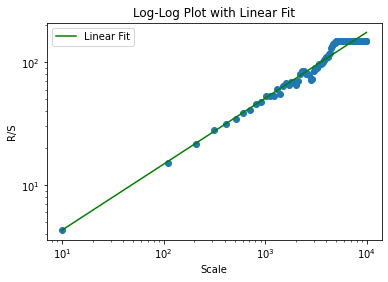

In [16]:
plt.plot(10**x, 10**(popt[0]*x+popt[1]),'g-', label='Linear Fit')

plt.scatter( scale, R_S)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Scale')
plt.ylabel('R/S')
plt.title('Log-Log Plot with Linear Fit')
plt.legend()
plt.show()

# Check with Matlab function

https://www.mathworks.com/matlabcentral/fileexchange/9842-hurst-exponent

In [8]:
arr = np.loadtxt("myFile.csv",
                 delimiter=",", dtype=float)
display(arr)

array([0.81472, 0.90579, 0.12699, ..., 0.90088, 0.46404, 0.46936])

In [9]:
scale, R_S = calculate_R_S(arr)

In [10]:
from scipy.optimize import curve_fit
x,y = np.log10(scale), np.log10(R_S)

def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, x, y)
print(popt)

[0.53773909 0.094701  ]


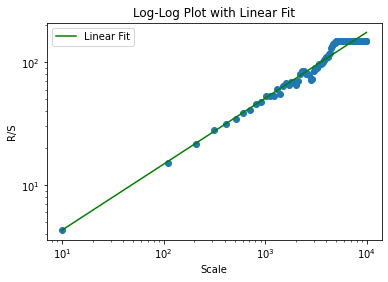

In [17]:
plt.plot(10**x, 10**(popt[0]*x+popt[1]),'g-', label='Linear Fit')

plt.scatter( scale, R_S)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Scale')
plt.ylabel('R/S')
plt.title('Log-Log Plot with Linear Fit')
plt.legend()
plt.show()